# Examen de Sistemas Inteligentes 2024
## Parte práctica
### Nombre del alumno

David Ferreras Díaz

***

**Instrucciones:** Carga el fichero mushroom.csv, y contexta las preguntas debajo de los encabezados.


### Ejercicio 1

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("./dementia_dataset.csv")

df = df.drop(columns=["Subject ID", "MRI ID"],axis=1)
# Para dropear las visitas menores a 2
# df = df.loc[df['Visit'] >= 2]
# contar nan y drop
countNaN = df.isna().sum()
print(countNaN)
df = df.dropna(how="any")
countNaN = df.isna().sum()
print(countNaN)

df_Hist = df

gen = df["M/F"].to_numpy()
hand = df["Hand"].to_numpy()
df = df.drop(columns=["M/F","Hand"],axis=1)

encoder = OneHotEncoder(sparse_output=False)
gen = encoder.fit_transform(gen.reshape(-1,1))
hand = encoder.fit_transform(hand.reshape(-1,1))

Y = df["Group"].to_numpy()
X = df.drop("Group", axis=1).to_numpy()

print(X.shape)
print(Y.shape)
X = np.hstack((X, gen, hand))
print(X.shape)

X_scaled = StandardScaler().fit_transform(X) #MinMaxScaler para salidas entre 0 y 1

x_train, x_test, y_train, y_test = train_test_split(
    X_scaled, Y,
    test_size=0.2,
    random_state=13,
    stratify=Y
)

print(x_train.shape)
print(x_test.shape)

Group        0
Visit        0
MR Delay     0
M/F          0
Hand         0
Age          0
EDUC         0
SES         11
MMSE         2
CDR          0
eTIV         0
nWBV         0
ASF          0
dtype: int64
Group       0
Visit       0
MR Delay    0
M/F         0
Hand        0
Age         0
EDUC        0
SES         0
MMSE        0
CDR         0
eTIV        0
nWBV        0
ASF         0
dtype: int64
(212, 10)
(212,)
(212, 13)
(169, 13)
(43, 13)


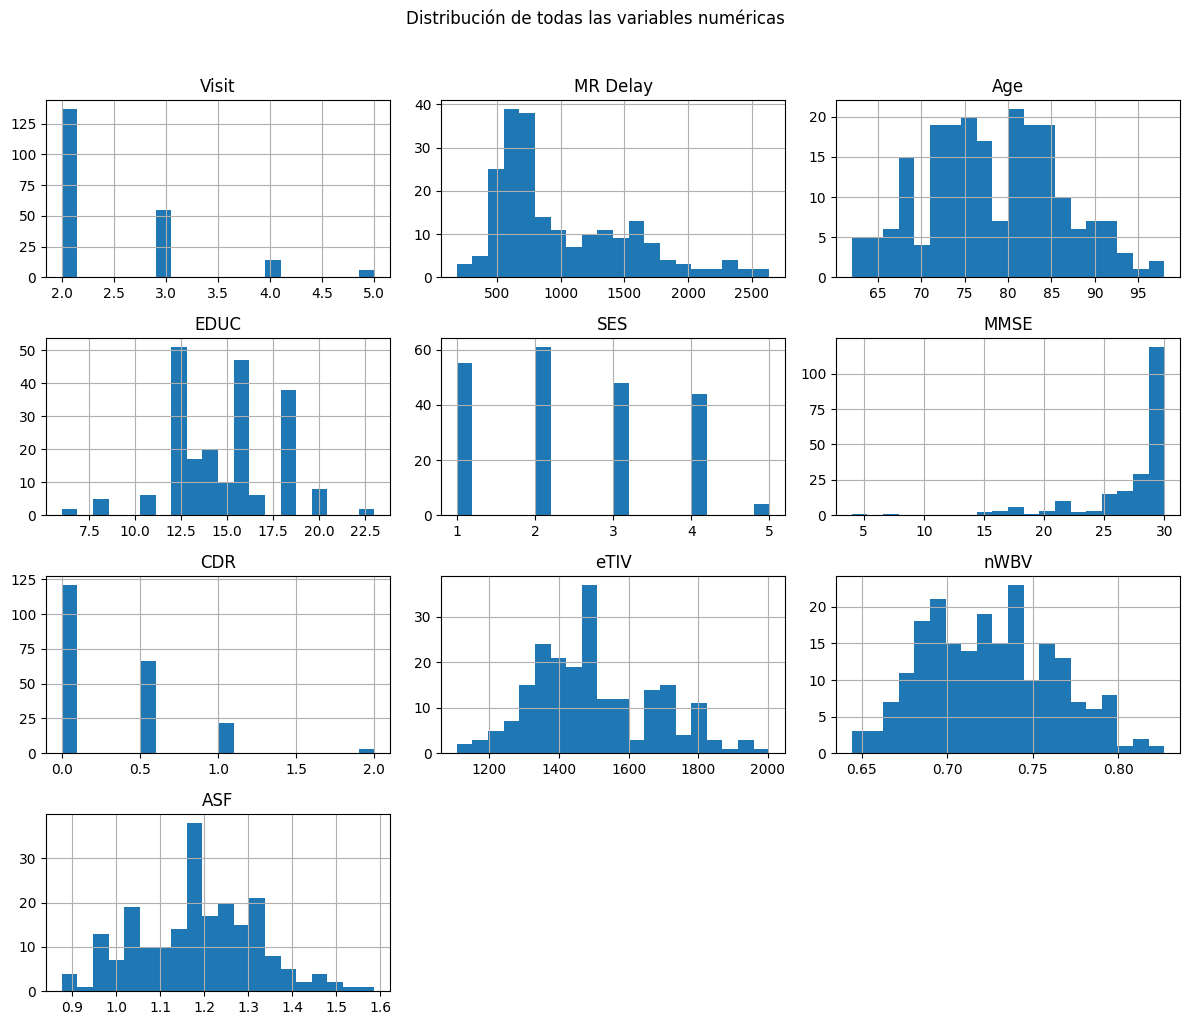

In [17]:
import matplotlib.pyplot as plt
df_Hist.hist(bins=20, figsize=(12, 10))
plt.suptitle('Distribución de todas las variables numéricas', y=1.02)
plt.tight_layout()
plt.show()

### Ejercicio 2

In [18]:
from sklearn.neural_network import MLPClassifier
import time 

t_p = time.time()
model_p = MLPClassifier(max_iter=900, alpha=0.01, learning_rate_init=0.001, random_state=42).fit(x_train, y_train)
t_p = time.time() - t_p

In [19]:
y_pred_p = model_p.predict(x_test)
acc_p = model_p.score(x_test, y_test)
print(acc_p)

0.9069767441860465


### Ejercicio 3

In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_split=2,
)
# Tiempo y modelo
t_init = time.time()
dt_model.fit(x_train, y_train)
t_decTree = time.time() - t_init

In [21]:
y_pred_dt = dt_model.predict(x_test)
acc_dt = dt_model.score(x_test, y_test)
print(acc_dt)

0.9069767441860465


### Ejercicio 4

In [22]:
from sklearn.metrics import confusion_matrix
print(f"Perceptron: {acc_p:.4f} Time: {t_p:.2f}")
print(f"Decision Tree: {acc_dt:.4f} Time: {t_decTree:.2f}")

def matrix_view(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm, index=['Actual (Demented)', 'Actual (Nondemented )', 'Actual (Converted)'],
    columns=['Pred (Demented)', 'Pred (Nondemented )', 'Pred (Converted)'])
    print(cm_df)

matrix_view(y_test, y_pred_p)
matrix_view(y_test, y_pred_dt)

Perceptron: 0.9070 Time: 0.25
Decision Tree: 0.9070 Time: 0.00
                       Pred (Demented)  Pred (Nondemented )  Pred (Converted)
Actual (Demented)                    2                    1                 2
Actual (Nondemented )                0                   14                 0
Actual (Converted)                   0                    1                23
                       Pred (Demented)  Pred (Nondemented )  Pred (Converted)
Actual (Demented)                    2                    1                 2
Actual (Nondemented )                0                   14                 0
Actual (Converted)                   0                    1                23
